In [ ]:
#project website: https://www.kaggle.com/competitions/shelter-animal-outcomes/overview

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

## EDA

In [3]:
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
...,...,...,...,...,...,...,...,...,...,...
26724,A702446,NaN,2015-05-14 11:56:00,Transfer,Partner,Cat,Intact Male,1 month,Domestic Shorthair Mix,Brown Tabby/White
26725,A718934,NaN,2016-01-20 18:59:00,Transfer,SCRP,Cat,Spayed Female,3 months,Domestic Shorthair Mix,Brown Tabby
26726,A698128,Zeus,2015-03-09 13:33:00,Adoption,NaN,Dog,Neutered Male,4 years,Old English Bulldog Mix,White/Tan
26727,A677478,NaN,2014-04-27 12:22:00,Transfer,Partner,Cat,Intact Male,4 weeks,Domestic Shorthair Mix,Black


## DATA CLEANING MANIPULATION

In [4]:
df.drop('AnimalID',axis=1, inplace = True)

In [5]:
df.drop('DateTime',axis=1, inplace = True)

In [6]:
df['Name'] = df['Name'].apply(lambda x: 1 if pd.notna(x) else 0)

In [7]:
df.isnull().sum()

Name                  0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            26729 non-null  int64 
 1   OutcomeType     26729 non-null  object
 2   OutcomeSubtype  13117 non-null  object
 3   AnimalType      26729 non-null  object
 4   SexuponOutcome  26728 non-null  object
 5   AgeuponOutcome  26711 non-null  object
 6   Breed           26729 non-null  object
 7   Color           26729 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


In [9]:
df['OutcomeSubtype'].unique()

array([nan, 'Suffering', 'Foster', 'Partner', 'Offsite', 'SCRP',
       'Aggressive', 'Behavior', 'Rabies Risk', 'Medical', 'In Kennel',
       'In Foster', 'Barn', 'Court/Investigation', 'Enroute', 'At Vet',
       'In Surgery'], dtype=object)

In [10]:
df['OutcomeSubtype'] = df['OutcomeSubtype'].fillna('healthy')

In [11]:
df['OutcomeSubtype'] = df['OutcomeSubtype'].replace(['Suffering', 'An Vet', 'Medical', 'In Surgery'], 'unhealthy')

In [12]:
df['SexuponOutcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

In [13]:
df['SexuponOutcome'] = df['SexuponOutcome'].fillna(df['SexuponOutcome'].mode()[0])

<Axes: xlabel='SexuponOutcome'>

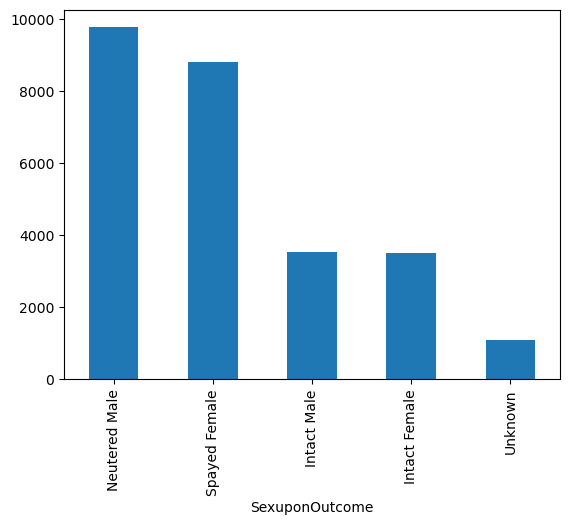

In [14]:
df['SexuponOutcome'].value_counts().plot.bar()

<Axes: xlabel='AgeuponOutcome'>

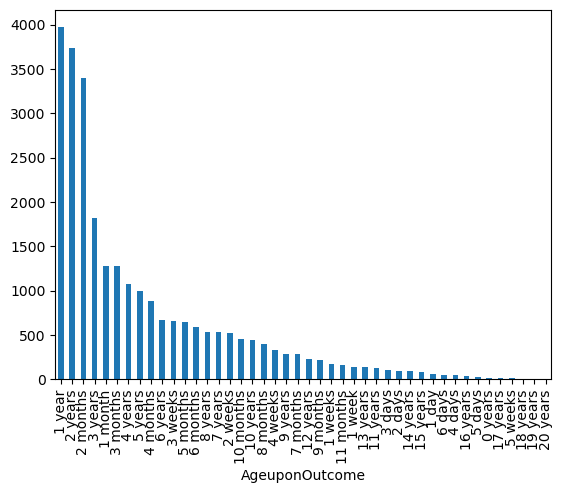

In [15]:
df['AgeuponOutcome'].value_counts().plot.bar()

In [16]:
df['AgeuponOutcome'] = df['AgeuponOutcome'].fillna(df['AgeuponOutcome'].mode()[0])

In [17]:
df['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years',
       '17 years', '18 years', '19 years', '20 years'], dtype=object)

In [18]:
def age_determination(text):
    split_parts = text.split(" ")
    
    age = 0;

    # Ensure there are at least two parts before trying to print
    if len(split_parts) >= 2:
        first_part = split_parts[0]
        value = int(first_part)
        second_part = split_parts[1]
        
        if second_part.lower() in ['years', 'year']:
            age = value;
        elif second_part.lower() in ['days','day']:
            age = float(value/365)
        elif second_part.lower() in ['weeks','week']: 
            age = float(value/52)
        elif second_part.lower() in ['months','month']:
            age = float(value/12)
        else:
            print('Error in age_determination function')
            print(text)
            

        #print("First part:", first_part)
        #print("Second part:", second_part)
    else:
        print("Text does not contain at least two parts.")
    return age
    
df['AgeuponOutcome'] = df['AgeuponOutcome'].apply(age_determination)        

In [19]:
df['AgeuponOutcome']

0        1.000000
1        1.000000
2        2.000000
3        0.057692
4        2.000000
           ...   
26724    0.083333
26725    0.250000
26726    4.000000
26727    0.076923
26728    1.000000
Name: AgeuponOutcome, Length: 26729, dtype: float64

In [20]:
# Enumerize the string values in the 'age_of_pets' column
mapping_dict = {value: index for index, value in enumerate(df['OutcomeType'].unique())}
df['OutcomeType'] = df['OutcomeType'].map(mapping_dict)

In [21]:
# Enumerize the string values in the 'age_of_pets' column
mapping_dict = {value: index for index, value in enumerate(df['OutcomeSubtype'].unique())}
df['OutcomeSubtype'] = df['OutcomeSubtype'].map(mapping_dict)

In [22]:
#mapping_dict = {'cat': 0, 'dog': 1}
#df['AnimalType'] = df['AnimalType'].map(mapping_dict)

In [23]:
#df['AnimalType'].unique()

In [24]:
df['OutcomeType']

0        0
1        1
2        2
3        3
4        3
        ..
26724    3
26725    3
26726    2
26727    3
26728    3
Name: OutcomeType, Length: 26729, dtype: int64

In [25]:
df['AnimalType'].unique()

array(['Dog', 'Cat'], dtype=object)

In [26]:
# Select columns with dtype 'object'
object_columns = df.select_dtypes(include='object')
# Count unique values in each selected column
unique_counts = object_columns.apply(lambda col: col.nunique())
# Sort the counts in ascending order
sorted_counts = unique_counts.sort_values()
# Print object name and value of unique counts line by line in ascending order
for column_name, count in sorted_counts.items():
    print(f"{column_name}: {count}")


AnimalType: 2
SexuponOutcome: 5
Color: 366
Breed: 1380


In [27]:
import re
def custom_split(input_string):
    # Check if the string contains both '/' and space
    if '/' in input_string and ' ' in input_string:
        # Split by both '/' and space
        result = re.split(r'[/\s]+', input_string)
    elif '/' in input_string:
        # Split only by '/'
        result = input_string.split('/')
    elif ' ' in input_string:
        # Split only by space
        result = input_string.split()
    else:
        # If there is only one word, leave it as is
        result = [input_string]

    return result

# Apply the custom split function and extract the first word
df['Color'] = df['Color'].apply(lambda x: custom_split(x)[0])

In [28]:
# Apply the custom split function and extract the first two words
df['Breed'] = df['Breed'].apply(lambda x: ' '.join(custom_split(x)[:2]))

In [29]:
breeds_array= df['Breed'].unique()
print(breeds_array)

['Shetland Sheepdog' 'Domestic Shorthair' 'Pit Bull' 'Lhasa Apso'
 'Cairn Terrier' 'American Pit' 'Miniature Schnauzer' 'Yorkshire Terrier'
 'Great Pyrenees' 'Angora Mix' 'Flat Coat' 'Queensland Heeler'
 'Plott Hound' 'German Shepherd' 'American Staffordshire'
 'Chihuahua Shorthair' 'Russian Blue' 'Labrador Retriever' 'Collie Smooth'
 'Domestic Longhair' 'Beagle' 'Blue Lacy' 'Black Mouth' 'Dachshund Beagle'
 'Dachshund Mix' 'Maltese Mix' 'Pointer Mix' 'English Foxhound'
 'Vizsla Mix' 'Cardigan Welsh' 'Chow Chow' 'Siamese Mix' 'Domestic Medium'
 'Boxer Great' 'Beagle Treeing' 'Border Collie' 'Border Terrier'
 'Boxer Mix' 'Dogo Argentino' 'Beagle Mix' 'Tibetan Terrier'
 'Miniature Pinscher' 'Rat Terrier' 'Dachshund Longhair'
 'Dachshund Chihuahua' 'Maltese' 'Dachshund Manchester' 'Siberian Husky'
 'Australian Cattle' 'Catahoula Labrador' 'Miniature Poodle'
 'Jack Russell' 'Catahoula Mix' 'Doberman Pinsch' 'Dachshund Jack'
 'Whippet Mix' 'Australian Shepherd' 'English Pointer' 'Great Dane

## MODELING

In [30]:
y = df['OutcomeType']
x = df.drop('OutcomeType', axis=1, inplace = False)
x=pd.get_dummies(x,drop_first=True)

In [31]:
x.shape, y.shape

((26729, 516), (26729,))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            26729 non-null  int64  
 1   OutcomeType     26729 non-null  int64  
 2   OutcomeSubtype  26729 non-null  int64  
 3   AnimalType      26729 non-null  object 
 4   SexuponOutcome  26729 non-null  object 
 5   AgeuponOutcome  26729 non-null  float64
 6   Breed           26729 non-null  object 
 7   Color           26729 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.6+ MB


In [33]:
def algo_test(x,y):
#def algo_test(x_train,x_test,y_train,y_test):
    
    import numpy as np

    from scipy import stats
    import matplotlib.pyplot as plt
    %matplotlib inline 
    import seaborn as sns


    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
    from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
    from sklearn.tree import ExtraTreeClassifier
    from sklearn.ensemble import GradientBoostingRegressor
    from xgboost import XGBRegressor 

    from sklearn.model_selection import train_test_split

    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import ExtraTreesClassifier
    from xgboost import XGBClassifier

    import warnings
    warnings.filterwarnings('ignore')
#plt.style.use('')

    
    
    G = GaussianNB()
    B = BernoulliNB()
    #K = KNeighborsClassifier()
    L = LogisticRegression()
    D = DecisionTreeClassifier()
    RF = RandomForestClassifier()
    ETC = ExtraTreesClassifier()
    XG = XGBClassifier()

    
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 13)
    
    algos = [G,B,L,D, RF, ETC, XG]
    #algos = [G,B,L,D,  RF, ETC]
    
    #algo_names = [ "Gaussian", "Bernoulli", "K-Neighbors", "Logistic Regression", "Decision Tree", "Random Forest", "ExtraTreeClassifier" ]
    algo_names = [ "Gaussian", "Bernoulli","Logistic Regression", "Decision Tree", \
                  "Random Forest", "ExtraTreeClassifier","XGBClassifier" ]
    
    ASC = [];
    
    result =  result = pd.DataFrame(columns =['Accuracy_Score'], index = algo_names)
    
    i = 0;
    for algo in algos :
        
        algo.fit(x_train,y_train)
        #print (accuracy_score(  y_test, algo.predict(x_test) ))
        ASC.append(  accuracy_score(  y_test, algo.predict(x_test) ) )
        
        print( "Confusion matrix: ",format(algo_names[i]) )
        i = i+1;
        print ( confusion_matrix(algo.predict(x_test),y_test) )
        #print (classification_report(y_test,algo.predict(x_test) ))
        
        #algo.fit(x,y)
        #print (accuracy_score(  y, algo.predict(x) ))
        #ASC.append(  accuracy_score(  y, algo.predict(x) ) )
    
    
    result.Accuracy_Score = ASC;

    return result.sort_values('Accuracy_Score', ascending=False)

In [34]:
algo_test(x,y)

Confusion matrix:  Gaussian
[[  66    0   78    1    0]
 [ 337   53  555  346    5]
 [  14    4   33   23    0]
 [  10    3   38   40    1]
 [ 544  238 1407 1519   31]]
Confusion matrix:  Bernoulli
[[ 685    0  629    1    1]
 [   0    9    0   27    0]
 [ 285   72 1239  384    6]
 [   1  217  243 1517   30]
 [   0    0    0    0    0]]
Confusion matrix:  Logistic Regression
[[ 494    0  186    1    0]
 [   1   56    6   32    0]
 [ 475   41 1859    6    4]
 [   1  199   60 1890    4]
 [   0    2    0    0   29]]
Confusion matrix:  Decision Tree
[[ 550    0  355    1    2]
 [   0  297    0    0    0]
 [ 419    1 1756    1    1]
 [   1    0    0 1927    0]
 [   1    0    0    0   34]]
Confusion matrix:  Random Forest
[[ 525    4  291    1    2]
 [   1  269    2    0    3]
 [ 443   20 1806    1    2]
 [   1    4   12 1927   17]
 [   1    1    0    0   13]]
Confusion matrix:  ExtraTreeClassifier
[[ 553   14  341    1    2]
 [   2  244    5    1    4]
 [ 413   26 1743   16    1]
 [   3   1

,Accuracy_Score
XGBClassifier,0.875421
Decision Tree,0.853722
Random Forest,0.849233
ExtraTreeClassifier,0.836326
Logistic Regression,0.809577
Bernoulli,0.645342
Gaussian,0.041713
